In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X, y = make_moons(n_samples=100, noise=0.15)

In [29]:
def plot_predictions(classifier, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X_grid = np.c_[x0.ravel(), x1.ravel()]
  y_pred = classifier.predict(X_grid).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.legend()

### Adding Polynomial features

#### Training

In [30]:
polynomial_svm_classifier = Pipeline([
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge"))
        ])
polynomial_svm_classifier.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

#### Visualising

No handles with labels found to put in legend.


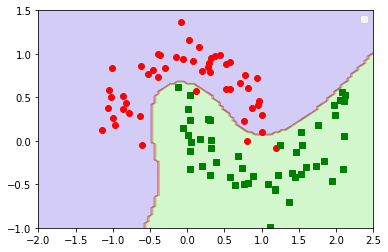

In [31]:
plt.plot(X[y==0][:,0], X[y==0][:,1], 'ro')
plt.plot(X[y==1][:,0], X[y==1][:,1], 'gs')
plot_predictions(polynomial_svm_classifier, [-2, 2.5, -1, 1.5])

### Polynomial Kernel


#### Training

In [32]:
poly_kernel_svm_classifier = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=5))
        ])
poly_kernel_svm_classifier.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=10, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

#### Visualising

No handles with labels found to put in legend.


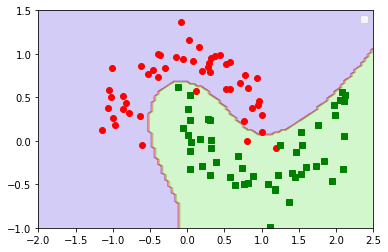

In [33]:
plt.plot(X[y==0][:,0], X[y==0][:,1], 'ro')
plt.plot(X[y==1][:,0], X[y==1][:,1], 'gs')
plot_predictions(poly_kernel_svm_classifier, [-2, 2.5, -1, 1.5])

### RBF Kernel

#### Training

In [46]:
gamma = 5 # Tune
C = 1000 # Tune
rbf_kernel_svm_classifier = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
rbf_kernel_svm_classifier.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

#### Visualising

No handles with labels found to put in legend.


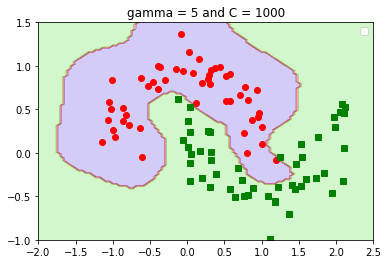

In [47]:
plt.plot(X[y==0][:,0], X[y==0][:,1], 'ro')
plt.plot(X[y==1][:,0], X[y==1][:,1], 'gs')
plt.title(f'gamma = {gamma} and C = {C}')
plot_predictions(rbf_kernel_svm_classifier, [-2, 2.5, -1, 1.5])

### Performance

In [18]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(polynomial_svm_classifier, X, y, cv=3, scoring="accuracy"))# The cv parameter is basically diving the test set into that many parts and training on one while testing on other

print(cross_val_score(poly_kernel_svm_classifier, X, y, cv=3, scoring="accuracy"))

print(cross_val_score(rbf_kernel_svm_classifier, X, y, cv=3, scoring="accuracy"))

[0.97058824 0.87878788 0.90909091]
[0.97058824 0.93939394 0.93939394]
[0.94117647 0.48484848 0.48484848]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
